# **Biking and smoking for Heart disease**

Thanks to Bnsreenu :)

Multiple Linear Regression uses several explanatory variables to predict the outcome of a response variable.
There are a lot of variables and multiple linear regression is designed to create a model 
based on all these variables. 

Data: https://cdn.scribbr.com/wp-content/uploads//2020/02/heart.data_.zip?_ga=2.217642335.893016210.1598387608-409916526.1598387608



**Importing Libraries & Loading Data**

In [55]:
#starting by importing the necessary libraries
import numpy as np #The library that handles all the numbers and matrices
import pandas as pd # This library is for reading and manipulating the data, can do a lot of things
import matplotlib.pyplot as plt #for data visualization 
import seaborn as sns

**Reading the data**

In [56]:
from google.colab import drive

In [57]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import os
os.chdir("/content/drive/My Drive/data")

In [59]:
#loading the heart data
df = pd.read_csv('heart_data.csv')
print(df.head())

   Unnamed: 0     biking    smoking  heart.disease
0           1  30.801246  10.896608      11.769423
1           2  65.129215   2.219563       2.854081
2           3   1.959665  17.588331      17.177803
3           4  44.800196   2.802559       6.816647
4           5  69.428454  15.974505       4.062224


In [14]:
df.shape

(498, 4)

**EDA**

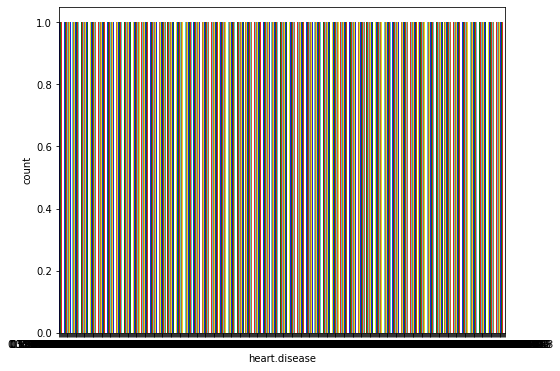

In [17]:
# Unique values of airline

col = ['blue', 'green', 'red', 'turquoise', 'chocolate', 'yellow']
plt.figure(figsize=(8,6))
ax = sns.countplot(x="heart.disease", data=df, palette = col)

In [60]:
df = df.drop("Unnamed: 0", axis=1)

In [61]:
df.shape

(498, 3)

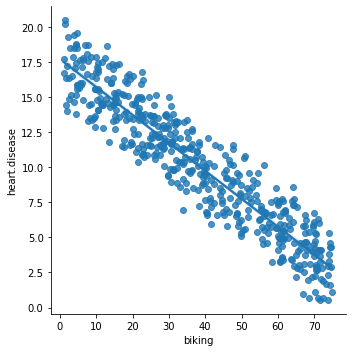

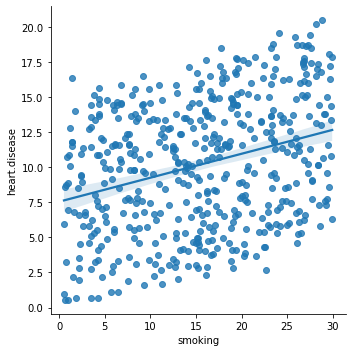

In [21]:
sns.lmplot(x='biking', y='heart.disease', data=df)
sns.lmplot(x='smoking', y='heart.disease', data=df)

In [62]:
x_df = df.drop('heart.disease', axis=1)
y_df = df['heart.disease']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=42)

Modeling:

In [64]:
from sklearn import linear_model

In [65]:
model = linear_model.LinearRegression()

Now let us call fit method to train the model using independent variables.

And the value that needs to be predicted (Images_Analyzed)

In [66]:
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9811067878031208


Prediction:

In [67]:
prediction_test = model.predict(X_test)    
print(y_test, prediction_test)
print("Mean sq. error between y_test and predicted =", np.mean(prediction_test-y_test)**2)

487     6.756015
73      9.466026
231    14.088654
175    13.377430
237    16.384678
         ...    
193    14.547755
5       9.550046
116    14.411483
45     12.328899
16      5.443342
Name: heart.disease, Length: 150, dtype: float64 [ 5.61417231  9.23854928 15.77064591 13.96271678 16.97258754 13.38551065
  7.02565417  9.49069576  6.83117942 12.07219675  8.04307687 10.14595377
  5.91159788 10.14538696  7.3415733  17.65460707  4.15655062  6.87547269
  5.24683245  6.77480127  2.08250582  7.39533445 12.03453847 13.99326278
 12.09739539 13.60433903  6.19490735  9.56118094 13.94750676 11.82223539
  8.52602497 11.48105164 12.41957266 17.7284097   3.53706181  6.09047121
  8.17208463  7.50053942 12.56170624 10.47015413  4.88309485  4.00779535
  7.798394   10.9073288  10.77541879  8.85290916 17.03995211  7.50903037
 18.06939528  4.58997823  1.73224979  5.01082459  6.82467948 15.23572133
  9.30772808  6.34302188  8.37575419 10.34808915 13.74750805  3.50515222
  7.30319722  6.67918277 13.686728

Save the model!!

In [68]:
import pickle
pickle.dump(model, open('model_heartV1.pkl', 'wb'))

In [70]:
model = pickle.load(open('model_heartV1.pkl', 'rb'))
print(model.predict([[30.1, 26.3]]))

[13.63821746]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Model is ready. Let us check the coefficients, stored as reg.coef_.

These are a, b, and c from our equation. 

Intercept is stored as reg.intercept_

print(model.coef_, model.intercept_)

All set to predict the number of images someone would analyze at a given time

print(model.predict([[13, 2, 23]]))